In [5]:
# Import modules
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import numpy as np
import xgboost as xgb
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.datasets import dump_svmlight_file
from sklearn.externals import joblib
from sklearn.metrics import precision_score
from keras.preprocessing.image import ImageDataGenerator
import glob
import cv2
from sklearn import datasets, svm, metrics
from sklearn.metrics import accuracy_score

# Import PySwarms
import pyswarms as ps

Using TensorFlow backend.


In [6]:
X_Train=[]
Y_Train=[]
for filename in glob.iglob('/Users/kumaramanivelramanathan/Downloads/Emo_Detection/Dataset/train/Angry/*'):
    image=cv2.imread(filename)
    image=cv2.resize(image,(64,64))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    X_Train.append(image)
    Y_Train.append(0)
for filename in glob.iglob('/Users/kumaramanivelramanathan/Downloads/Emo_Detection/Dataset/train/disgust/*'):
    image=cv2.imread(filename)
    image=cv2.resize(image,(64,64))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    X_Train.append(image)
    Y_Train.append(1)
for filename in glob.iglob('/Users/kumaramanivelramanathan/Downloads/Emo_Detection/Dataset/train/fear/*'):
    image=cv2.imread(filename)
    image=cv2.resize(image,(64,64))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    X_Train.append(image)
    Y_Train.append(2)
for filename in glob.iglob('/Users/kumaramanivelramanathan/Downloads/Emo_Detection/Dataset/train/happy/*'):
    image=cv2.imread(filename)
    image=cv2.resize(image,(64,64))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    X_Train.append(image)
    Y_Train.append(3)
for filename in glob.iglob('/Users/kumaramanivelramanathan/Downloads/Emo_Detection/Dataset/train/Sad/*'):
    image=cv2.imread(filename)
    image=cv2.resize(image,(64,64))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    X_Train.append(image)
    Y_Train.append(4)
for filename in glob.iglob('/Users/kumaramanivelramanathan/Downloads/Emo_Detection/Dataset/train/neutral/*'):
    image=cv2.imread(filename)
    image=cv2.resize(image,(64,64))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    X_Train.append(image)
    Y_Train.append(5)
for filename in glob.iglob('/Users/kumaramanivelramanathan/Downloads/Emo_Detection/Dataset/train/surprise/*'):
    image=cv2.imread(filename)
    image=cv2.resize(image,(64,64))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    X_Train.append(image)
    Y_Train.append(6)
print(len(X_Train))
print(len(Y_Train))

    
    

28709
28709


In [10]:
X_Test=[]
Y_Test=[]
for filename in glob.iglob('/Users/kumaramanivelramanathan/Downloads/Emo_Detection/Dataset/test/angry/*'):
    image=cv2.imread(filename)
    #print(len(image))
    image=cv2.resize(image,(64,64))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    X_Test.append(image)
    Y_Test.append(0)
for filename in glob.iglob('/Users/kumaramanivelramanathan/Downloads/Emo_Detection/Dataset/test/disgust/*'):
    image=cv2.imread(filename)
    image=cv2.resize(image,(64,64))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    X_Test.append(image)
    Y_Test.append(1)
for filename in glob.iglob('/Users/kumaramanivelramanathan/Downloads/Emo_Detection/Dataset/test/fear/*'):
    image=cv2.imread(filename)
    image=cv2.resize(image,(64,64))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    X_Test.append(image)
    Y_Test.append(2)
for filename in glob.iglob('/Users/kumaramanivelramanathan/Downloads/Emo_Detection/Dataset/test/happy/*'):
    image=cv2.imread(filename)
    image=cv2.resize(image,(64,64))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    X_Test.append(image)
    Y_Test.append(3)
for filename in glob.iglob('/Users/kumaramanivelramanathan/Downloads/Emo_Detection/Dataset/test/sad/*'):
    image=cv2.imread(filename)
    image=cv2.resize(image,(64,64))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    X_Test.append(image)
    Y_Test.append(4)
for filename in glob.iglob('/Users/kumaramanivelramanathan/Downloads/Emo_Detection/Dataset/test/neutral/*'):
    image=cv2.imread(filename)
    image=cv2.resize(image,(64,64))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    X_Test.append(image)
    Y_Test.append(4)
for filename in glob.iglob('/Users/kumaramanivelramanathan/Downloads/Emo_Detection/Dataset/test/surprise/*'):
    image=cv2.imread(filename)
    image=cv2.resize(image,(64,64))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    X_Test.append(image)
    Y_Test.append(4)
print(len(X_Test))
print(len(Y_Test))

7178
7178


In [11]:
n_samples = len(X_Train)
X_Train = np.asarray(X_Train) 
X_Train= X_Train.reshape((n_samples, -1))
Y_Train = np.asarray(Y_Train)
n_samples = len(X_Test)
#X_Test = np.asarray(X_Test) 
#X_Test= X_Test.reshape((n_samples, -1))
#Y_Test = np.asarray(Y_Test)
#for i in range(0,len(X_Test)):
    #X_Train.append(X_Test[i])
    #Y_Train.append(Y_Test[i])

In [12]:
len(X_Train)
len(X_Train[0])

4096

In [13]:
import pandas as pd
df=pd.read_csv('/Users/kumaramanivelramanathan/Downloads/Emo_Detection/Dataset/train/training/training.csv')

In [14]:
df.drop(columns='Unnamed: 0', inplace = True)
df['label'] = df['label'] - 1
#df=df[(df['label']!=5) & (df['label']!=6)]
df['label'].unique()

array([1, 2, 3, 4, 5, 0, 6])

In [15]:
X_Train=df.iloc[:,0:7]
Y_Train=df.iloc[:,7]
print(len(X_Train))

17250


In [16]:
df.columns

Index(['mouth_curve', 'mouth_length', 'mouth_height', 'eyebrow_l', 'eyebrow_r',
       'eye_length', 'eye_height', 'label'],
      dtype='object')

In [17]:
def dlrelu(x, alpha=0.01):
    dx = np.ones_like(x)
    dx[x < 0] = alpha
    return dx
def forward_prop(params):
    """Forward propagation as objective function

    This computes for the forward propagation of the neural network, as
    well as the loss. It receives a set of parameters that must be
    rolled-back into the corresponding weights and biases.

    Inputs
    ------
    params: np.ndarray
        The dimensions should include an unrolled version of the
        weights and biases.

    Returns
    -------
    float
        The computed negative log-likelihood loss given the parameters
    """
    # Neural network architecture
    n_inputs = 7
    n_hidden = 20
    n_classes = 7

    # Roll-back the weights and biases
    W1 = params[0:140].reshape((n_inputs,n_hidden))
    b1 = params[140:160].reshape((n_hidden,))
    W2 = params[160:300].reshape((n_hidden,n_classes))
    b2 = params[300:307].reshape((n_classes,))

    # Perform forward propagation
    z1 = X_Train.dot(W1) + b1  # Pre-activation in Layer 1
    a1 = dlrelu(z1)     # Activation in Layer 1
    z2 = a1.dot(W2) + b2 # Pre-activation in Layer 2
    logits = z2          # Logits for Layer 2

    
    # Compute for the softmax of the logits
    exp_scores = np.exp(logits)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
    print(len(probs))

    # Compute for the negative log likelihood
    N = 17250 # Number of samples
    print(len(Y_Train), N)
    corect_logprobs = -np.log(probs[range(N), Y_Train])
    loss = np.sum(corect_logprobs) / N



    return loss

In [18]:
def f(X_Train):
    """Higher-level method to do forward_prop in the
    whole swarm.

    Inputs
    ------
    x: numpy.ndarray of shape (n_particles, dimensions)
        The swarm that will perform the search

    Returns
    -------
    numpy.ndarray of shape (n_particles, )
        The computed loss for each particle
    """
    n_particles = X_Train.shape[0]
    j = [forward_prop(X_Train[i]) for i in range(n_particles)]
    return np.array(j)

In [19]:
len(X_Train)

17250

In [ ]:
from pyswarms.utils.functions import single_obj as fx
options = {'c1': 0.5, 'c2': 0.5, 'w': 0.9}

# Call instance of PSO
dimensions = (7* 20) + (20 * 7) + 20 + 7
optimizer = ps.single.GlobalBestPSO(n_particles=100, dimensions=dimensions, options=options)

# Perform optimization
cost, pos = optimizer.optimize(f, iters=10000)

2020-11-17 20:09:38,520 - pyswarms.single.global_best - INFO - Optimize for 10000 iters with {'c1': 0.5, 'c2': 0.5, 'w': 0.9}
pyswarms.single.global_best:   0%|          |0/10000

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   0%|          |1/10000, best_cost=1.92

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   0%|          |2/10000, best_cost=1.92

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   0%|          |3/10000, best_cost=1.92

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   0%|          |4/10000, best_cost=1.92

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   0%|          |5/10000, best_cost=1.92

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   0%|          |6/10000, best_cost=1.89

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   0%|          |7/10000, best_cost=1.89

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   0%|          |8/10000, best_cost=1.89

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   0%|          |9/10000, best_cost=1.89

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   0%|          |10/10000, best_cost=1.89

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   0%|          |11/10000, best_cost=1.89

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   0%|          |12/10000, best_cost=1.89

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   0%|          |13/10000, best_cost=1.85

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   0%|          |14/10000, best_cost=1.85

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   0%|          |15/10000, best_cost=1.85

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   0%|          |16/10000, best_cost=1.85

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   0%|          |17/10000, best_cost=1.85

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   0%|          |18/10000, best_cost=1.85

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   0%|          |19/10000, best_cost=1.85

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   0%|          |20/10000, best_cost=1.85

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   0%|          |21/10000, best_cost=1.83

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   0%|          |22/10000, best_cost=1.81

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   0%|          |23/10000, best_cost=1.8 

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   0%|          |24/10000, best_cost=1.8

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   0%|          |25/10000, best_cost=1.8

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   0%|          |26/10000, best_cost=1.8

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   0%|          |27/10000, best_cost=1.8

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   0%|          |28/10000, best_cost=1.8

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   0%|          |29/10000, best_cost=1.8

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   0%|          |30/10000, best_cost=1.77

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   0%|          |31/10000, best_cost=1.75

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   0%|          |32/10000, best_cost=1.74

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   0%|          |33/10000, best_cost=1.74

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   0%|          |34/10000, best_cost=1.74

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   0%|          |35/10000, best_cost=1.74

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   0%|          |36/10000, best_cost=1.74

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   0%|          |37/10000, best_cost=1.74

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   0%|          |38/10000, best_cost=1.74

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   0%|          |39/10000, best_cost=1.74

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   0%|          |40/10000, best_cost=1.74

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   0%|          |41/10000, best_cost=1.74

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   0%|          |42/10000, best_cost=1.74

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   0%|          |43/10000, best_cost=1.74

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   0%|          |44/10000, best_cost=1.72

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   0%|          |45/10000, best_cost=1.72

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   0%|          |46/10000, best_cost=1.72

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   0%|          |47/10000, best_cost=1.72

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   0%|          |48/10000, best_cost=1.72

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   0%|          |49/10000, best_cost=1.72

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   0%|          |50/10000, best_cost=1.71

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   1%|          |51/10000, best_cost=1.71

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   1%|          |52/10000, best_cost=1.71

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   1%|          |53/10000, best_cost=1.71

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   1%|          |54/10000, best_cost=1.71

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   1%|          |55/10000, best_cost=1.71

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   1%|          |56/10000, best_cost=1.71

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   1%|          |57/10000, best_cost=1.7 

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   1%|          |58/10000, best_cost=1.7

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   1%|          |59/10000, best_cost=1.69

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   1%|          |60/10000, best_cost=1.69

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   1%|          |61/10000, best_cost=1.69

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   1%|          |62/10000, best_cost=1.69

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   1%|          |63/10000, best_cost=1.69

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   1%|          |64/10000, best_cost=1.68

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   1%|          |65/10000, best_cost=1.68

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   1%|          |66/10000, best_cost=1.68

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   1%|          |67/10000, best_cost=1.68

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   1%|          |68/10000, best_cost=1.68

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   1%|          |69/10000, best_cost=1.67

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   1%|          |70/10000, best_cost=1.67

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   1%|          |71/10000, best_cost=1.67

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   1%|          |72/10000, best_cost=1.67

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   1%|          |73/10000, best_cost=1.67

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   1%|          |74/10000, best_cost=1.66

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   1%|          |75/10000, best_cost=1.66

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   1%|          |76/10000, best_cost=1.66

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   1%|          |77/10000, best_cost=1.66

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   1%|          |78/10000, best_cost=1.66

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   1%|          |79/10000, best_cost=1.66

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   1%|          |80/10000, best_cost=1.66

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   1%|          |81/10000, best_cost=1.66

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   1%|          |82/10000, best_cost=1.66

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   1%|          |83/10000, best_cost=1.65

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   1%|          |84/10000, best_cost=1.65

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   1%|          |85/10000, best_cost=1.65

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   1%|          |86/10000, best_cost=1.65

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   1%|          |87/10000, best_cost=1.65

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   1%|          |88/10000, best_cost=1.65

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   1%|          |89/10000, best_cost=1.65

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   1%|          |90/10000, best_cost=1.65

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   1%|          |91/10000, best_cost=1.65

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   1%|          |92/10000, best_cost=1.65

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   1%|          |93/10000, best_cost=1.65

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   1%|          |94/10000, best_cost=1.65

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   1%|          |95/10000, best_cost=1.65

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   1%|          |96/10000, best_cost=1.64

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   1%|          |97/10000, best_cost=1.64

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   1%|          |98/10000, best_cost=1.64

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   1%|          |99/10000, best_cost=1.64

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   1%|          |100/10000, best_cost=1.64

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   1%|          |101/10000, best_cost=1.64

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   1%|          |102/10000, best_cost=1.64

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   1%|          |103/10000, best_cost=1.64

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   1%|          |104/10000, best_cost=1.64

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   1%|          |105/10000, best_cost=1.64

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   1%|          |106/10000, best_cost=1.64

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   1%|          |107/10000, best_cost=1.64

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   1%|          |108/10000, best_cost=1.64

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   1%|          |109/10000, best_cost=1.64

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   1%|          |110/10000, best_cost=1.64

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   1%|          |111/10000, best_cost=1.64

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   1%|          |112/10000, best_cost=1.64

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   1%|          |113/10000, best_cost=1.64

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   1%|          |114/10000, best_cost=1.64

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   1%|          |115/10000, best_cost=1.64

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   1%|          |116/10000, best_cost=1.64

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   1%|          |116/10000, best_cost=1.63

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250


pyswarms.single.global_best:   1%|          |117/10000, best_cost=1.63

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   1%|          |118/10000, best_cost=1.63

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   1%|          |119/10000, best_cost=1.63

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   1%|          |120/10000, best_cost=1.63

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   1%|          |121/10000, best_cost=1.63

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   1%|          |122/10000, best_cost=1.63

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   1%|          |123/10000, best_cost=1.62

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   1%|          |124/10000, best_cost=1.62

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   1%|▏         |125/10000, best_cost=1.62

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   1%|▏         |126/10000, best_cost=1.62

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   1%|▏         |127/10000, best_cost=1.62

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   1%|▏         |128/10000, best_cost=1.62

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   1%|▏         |129/10000, best_cost=1.61

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   1%|▏         |130/10000, best_cost=1.61

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   1%|▏         |131/10000, best_cost=1.61

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   1%|▏         |132/10000, best_cost=1.61

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   1%|▏         |133/10000, best_cost=1.61

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   1%|▏         |134/10000, best_cost=1.61

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   1%|▏         |135/10000, best_cost=1.61

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   1%|▏         |136/10000, best_cost=1.61

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   1%|▏         |137/10000, best_cost=1.61

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   1%|▏         |138/10000, best_cost=1.61

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   1%|▏         |139/10000, best_cost=1.61

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   1%|▏         |140/10000, best_cost=1.61

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   1%|▏         |141/10000, best_cost=1.61

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   1%|▏         |142/10000, best_cost=1.61

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   1%|▏         |143/10000, best_cost=1.61

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   1%|▏         |144/10000, best_cost=1.61

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   1%|▏         |145/10000, best_cost=1.61

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   1%|▏         |146/10000, best_cost=1.61

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   1%|▏         |147/10000, best_cost=1.61

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   1%|▏         |148/10000, best_cost=1.6 

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   1%|▏         |149/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   2%|▏         |150/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   2%|▏         |151/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   2%|▏         |152/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   2%|▏         |153/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   2%|▏         |154/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   2%|▏         |155/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   2%|▏         |156/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   2%|▏         |157/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   2%|▏         |158/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   2%|▏         |159/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   2%|▏         |160/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   2%|▏         |161/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   2%|▏         |162/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   2%|▏         |163/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   2%|▏         |164/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   2%|▏         |165/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   2%|▏         |166/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   2%|▏         |167/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   2%|▏         |168/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   2%|▏         |169/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   2%|▏         |170/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   2%|▏         |171/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   2%|▏         |172/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   2%|▏         |173/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   2%|▏         |174/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   2%|▏         |175/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   2%|▏         |176/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   2%|▏         |177/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   2%|▏         |178/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   2%|▏         |179/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   2%|▏         |180/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   2%|▏         |181/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   2%|▏         |182/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   2%|▏         |183/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   2%|▏         |184/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   2%|▏         |185/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   2%|▏         |186/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   2%|▏         |187/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   2%|▏         |188/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   2%|▏         |189/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   2%|▏         |190/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   2%|▏         |191/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   2%|▏         |192/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   2%|▏         |193/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   2%|▏         |194/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   2%|▏         |195/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   2%|▏         |196/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   2%|▏         |197/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   2%|▏         |198/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   2%|▏         |199/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   2%|▏         |200/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   2%|▏         |201/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   2%|▏         |202/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   2%|▏         |203/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   2%|▏         |204/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   2%|▏         |205/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   2%|▏         |206/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   2%|▏         |207/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   2%|▏         |208/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   2%|▏         |209/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   2%|▏         |210/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   2%|▏         |211/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   2%|▏         |212/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   2%|▏         |213/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   2%|▏         |214/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   2%|▏         |215/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   2%|▏         |216/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   2%|▏         |217/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   2%|▏         |218/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   2%|▏         |219/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   2%|▏         |220/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   2%|▏         |221/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   2%|▏         |222/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   2%|▏         |223/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   2%|▏         |224/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   2%|▏         |225/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   2%|▏         |226/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   2%|▏         |227/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   2%|▏         |228/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   2%|▏         |229/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   2%|▏         |230/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   2%|▏         |231/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   2%|▏         |232/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   2%|▏         |233/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   2%|▏         |234/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   2%|▏         |235/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   2%|▏         |236/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   2%|▏         |237/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   2%|▏         |238/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   2%|▏         |239/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   2%|▏         |240/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   2%|▏         |241/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   2%|▏         |242/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   2%|▏         |243/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   2%|▏         |244/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   2%|▏         |245/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   2%|▏         |246/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   2%|▏         |247/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   2%|▏         |248/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   2%|▏         |249/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   2%|▎         |250/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   3%|▎         |251/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   3%|▎         |252/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   3%|▎         |253/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   3%|▎         |254/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   3%|▎         |255/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   3%|▎         |256/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   3%|▎         |257/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   3%|▎         |258/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   3%|▎         |259/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   3%|▎         |260/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   3%|▎         |261/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   3%|▎         |262/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   3%|▎         |263/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   3%|▎         |264/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   3%|▎         |265/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   3%|▎         |266/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   3%|▎         |267/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   3%|▎         |268/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   3%|▎         |269/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   3%|▎         |270/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   3%|▎         |271/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   3%|▎         |272/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   3%|▎         |273/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   3%|▎         |274/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   3%|▎         |275/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   3%|▎         |276/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   3%|▎         |277/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   3%|▎         |278/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   3%|▎         |279/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   3%|▎         |280/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   3%|▎         |281/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   3%|▎         |282/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   3%|▎         |283/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   3%|▎         |284/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   3%|▎         |285/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   3%|▎         |286/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   3%|▎         |287/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   3%|▎         |288/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   3%|▎         |289/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   3%|▎         |290/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   3%|▎         |291/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   3%|▎         |292/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   3%|▎         |293/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   3%|▎         |294/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   3%|▎         |295/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   3%|▎         |296/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   3%|▎         |297/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   3%|▎         |298/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   3%|▎         |299/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   3%|▎         |300/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   3%|▎         |301/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   3%|▎         |302/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   3%|▎         |303/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   3%|▎         |304/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   3%|▎         |305/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   3%|▎         |306/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   3%|▎         |307/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   3%|▎         |308/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   3%|▎         |309/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   3%|▎         |310/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   3%|▎         |311/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   3%|▎         |312/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   3%|▎         |313/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   3%|▎         |314/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   3%|▎         |315/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   3%|▎         |316/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   3%|▎         |317/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   3%|▎         |318/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   3%|▎         |319/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   3%|▎         |320/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   3%|▎         |321/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   3%|▎         |322/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   3%|▎         |323/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   3%|▎         |324/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   3%|▎         |325/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   3%|▎         |326/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   3%|▎         |327/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   3%|▎         |328/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   3%|▎         |329/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   3%|▎         |330/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   3%|▎         |331/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   3%|▎         |332/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   3%|▎         |333/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   3%|▎         |334/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   3%|▎         |335/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   3%|▎         |336/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   3%|▎         |337/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   3%|▎         |338/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   3%|▎         |339/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   3%|▎         |340/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   3%|▎         |341/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   3%|▎         |342/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   3%|▎         |343/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   3%|▎         |344/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   3%|▎         |345/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   3%|▎         |346/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   3%|▎         |347/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   3%|▎         |348/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   3%|▎         |349/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   4%|▎         |350/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   4%|▎         |351/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   4%|▎         |352/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   4%|▎         |353/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   4%|▎         |354/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   4%|▎         |355/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   4%|▎         |356/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   4%|▎         |357/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   4%|▎         |358/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   4%|▎         |359/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   4%|▎         |359/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250


pyswarms.single.global_best:   4%|▎         |360/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   4%|▎         |361/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   4%|▎         |362/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   4%|▎         |363/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   4%|▎         |364/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   4%|▎         |365/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   4%|▎         |366/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   4%|▎         |367/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   4%|▎         |368/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   4%|▎         |369/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   4%|▎         |370/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   4%|▎         |371/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   4%|▎         |372/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   4%|▎         |373/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   4%|▎         |374/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   4%|▍         |375/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   4%|▍         |376/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   4%|▍         |377/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   4%|▍         |378/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   4%|▍         |379/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   4%|▍         |380/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   4%|▍         |381/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   4%|▍         |382/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   4%|▍         |383/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   4%|▍         |384/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   4%|▍         |385/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   4%|▍         |386/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   4%|▍         |387/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   4%|▍         |388/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   4%|▍         |389/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   4%|▍         |390/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   4%|▍         |391/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   4%|▍         |392/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   4%|▍         |393/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   4%|▍         |394/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   4%|▍         |395/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   4%|▍         |396/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   4%|▍         |397/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   4%|▍         |398/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   4%|▍         |399/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   4%|▍         |400/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   4%|▍         |401/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   4%|▍         |402/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   4%|▍         |403/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   4%|▍         |404/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   4%|▍         |405/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   4%|▍         |406/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   4%|▍         |407/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   4%|▍         |408/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   4%|▍         |409/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   4%|▍         |410/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   4%|▍         |411/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   4%|▍         |412/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   4%|▍         |413/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   4%|▍         |414/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   4%|▍         |415/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   4%|▍         |416/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   4%|▍         |417/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   4%|▍         |418/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   4%|▍         |419/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   4%|▍         |420/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   4%|▍         |421/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   4%|▍         |422/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   4%|▍         |423/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   4%|▍         |424/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   4%|▍         |425/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   4%|▍         |426/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   4%|▍         |427/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   4%|▍         |428/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   4%|▍         |429/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   4%|▍         |430/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   4%|▍         |431/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   4%|▍         |432/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   4%|▍         |433/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   4%|▍         |434/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   4%|▍         |435/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   4%|▍         |436/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   4%|▍         |437/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   4%|▍         |438/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   4%|▍         |439/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   4%|▍         |440/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   4%|▍         |441/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   4%|▍         |442/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   4%|▍         |443/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   4%|▍         |444/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   4%|▍         |445/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   4%|▍         |446/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   4%|▍         |447/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   4%|▍         |448/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   4%|▍         |449/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   4%|▍         |450/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   5%|▍         |451/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   5%|▍         |452/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   5%|▍         |453/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   5%|▍         |454/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   5%|▍         |455/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   5%|▍         |456/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   5%|▍         |457/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   5%|▍         |458/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   5%|▍         |459/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   5%|▍         |460/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   5%|▍         |461/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   5%|▍         |462/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   5%|▍         |463/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   5%|▍         |464/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   5%|▍         |465/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   5%|▍         |466/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   5%|▍         |467/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   5%|▍         |468/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   5%|▍         |469/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   5%|▍         |470/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   5%|▍         |471/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   5%|▍         |472/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   5%|▍         |473/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   5%|▍         |474/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   5%|▍         |475/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   5%|▍         |476/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   5%|▍         |477/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   5%|▍         |478/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   5%|▍         |479/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   5%|▍         |480/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   5%|▍         |481/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   5%|▍         |482/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   5%|▍         |483/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   5%|▍         |484/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   5%|▍         |485/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   5%|▍         |486/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   5%|▍         |487/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   5%|▍         |488/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   5%|▍         |489/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   5%|▍         |490/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   5%|▍         |491/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   5%|▍         |492/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   5%|▍         |493/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   5%|▍         |494/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   5%|▍         |495/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   5%|▍         |496/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   5%|▍         |497/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   5%|▍         |498/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   5%|▍         |499/10000, best_cost=1.6


17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
172

pyswarms.single.global_best:   5%|▌         |500/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   5%|▌         |501/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   5%|▌         |502/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   5%|▌         |503/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   5%|▌         |504/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   5%|▌         |505/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   5%|▌         |506/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   5%|▌         |507/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   5%|▌         |508/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   5%|▌         |509/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   5%|▌         |510/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   5%|▌         |511/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   5%|▌         |512/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   5%|▌         |513/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   5%|▌         |514/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   5%|▌         |515/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   5%|▌         |516/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   5%|▌         |517/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   5%|▌         |518/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   5%|▌         |519/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   5%|▌         |520/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   5%|▌         |521/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   5%|▌         |522/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   5%|▌         |523/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   5%|▌         |524/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   5%|▌         |525/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   5%|▌         |526/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   5%|▌         |527/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   5%|▌         |528/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   5%|▌         |529/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   5%|▌         |530/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   5%|▌         |531/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   5%|▌         |532/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   5%|▌         |533/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   5%|▌         |534/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   5%|▌         |535/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   5%|▌         |536/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   5%|▌         |537/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   5%|▌         |538/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   5%|▌         |539/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   5%|▌         |540/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   5%|▌         |541/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   5%|▌         |542/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   5%|▌         |543/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   5%|▌         |544/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   5%|▌         |545/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   5%|▌         |546/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   5%|▌         |547/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   5%|▌         |548/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   5%|▌         |549/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   6%|▌         |550/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   6%|▌         |551/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   6%|▌         |552/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   6%|▌         |553/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   6%|▌         |554/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   6%|▌         |555/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   6%|▌         |556/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   6%|▌         |557/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   6%|▌         |558/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   6%|▌         |559/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   6%|▌         |560/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   6%|▌         |561/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   6%|▌         |562/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   6%|▌         |563/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   6%|▌         |564/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   6%|▌         |565/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   6%|▌         |566/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   6%|▌         |567/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   6%|▌         |568/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   6%|▌         |569/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   6%|▌         |570/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   6%|▌         |571/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   6%|▌         |572/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   6%|▌         |573/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   6%|▌         |574/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   6%|▌         |575/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   6%|▌         |575/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250


pyswarms.single.global_best:   6%|▌         |576/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   6%|▌         |577/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   6%|▌         |578/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   6%|▌         |579/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   6%|▌         |580/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   6%|▌         |581/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   6%|▌         |582/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   6%|▌         |583/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   6%|▌         |584/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   6%|▌         |585/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   6%|▌         |586/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   6%|▌         |587/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   6%|▌         |588/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   6%|▌         |589/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   6%|▌         |590/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   6%|▌         |591/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   6%|▌         |592/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   6%|▌         |593/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   6%|▌         |594/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   6%|▌         |595/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   6%|▌         |596/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   6%|▌         |597/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   6%|▌         |598/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   6%|▌         |599/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   6%|▌         |600/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   6%|▌         |601/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   6%|▌         |602/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   6%|▌         |603/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   6%|▌         |604/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   6%|▌         |605/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   6%|▌         |606/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   6%|▌         |607/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   6%|▌         |608/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   6%|▌         |609/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   6%|▌         |610/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   6%|▌         |611/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   6%|▌         |612/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   6%|▌         |613/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   6%|▌         |614/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   6%|▌         |615/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   6%|▌         |616/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   6%|▌         |617/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   6%|▌         |618/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   6%|▌         |619/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   6%|▌         |620/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   6%|▌         |621/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   6%|▌         |622/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   6%|▌         |623/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   6%|▌         |624/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   6%|▋         |625/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   6%|▋         |626/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   6%|▋         |627/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   6%|▋         |628/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   6%|▋         |629/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   6%|▋         |630/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   6%|▋         |631/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   6%|▋         |632/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   6%|▋         |633/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   6%|▋         |634/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   6%|▋         |635/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   6%|▋         |636/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   6%|▋         |637/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   6%|▋         |638/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   6%|▋         |639/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   6%|▋         |640/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   6%|▋         |641/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   6%|▋         |642/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   6%|▋         |643/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   6%|▋         |644/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   6%|▋         |645/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   6%|▋         |646/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   6%|▋         |647/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   6%|▋         |648/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   6%|▋         |649/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   6%|▋         |650/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   7%|▋         |651/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   7%|▋         |652/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   7%|▋         |653/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   7%|▋         |654/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   7%|▋         |655/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   7%|▋         |656/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   7%|▋         |657/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   7%|▋         |658/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   7%|▋         |659/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   7%|▋         |660/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   7%|▋         |661/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   7%|▋         |662/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   7%|▋         |663/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   7%|▋         |664/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   7%|▋         |665/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   7%|▋         |666/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   7%|▋         |667/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   7%|▋         |668/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   7%|▋         |669/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   7%|▋         |670/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   7%|▋         |671/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   7%|▋         |672/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   7%|▋         |673/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   7%|▋         |674/10000, best_cost=1.6

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   7%|▋         |675/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   7%|▋         |676/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   7%|▋         |677/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   7%|▋         |678/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   7%|▋         |679/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   7%|▋         |680/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   7%|▋         |681/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   7%|▋         |682/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   7%|▋         |683/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   7%|▋         |684/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   7%|▋         |685/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   7%|▋         |686/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   7%|▋         |687/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   7%|▋         |688/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   7%|▋         |689/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   7%|▋         |690/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   7%|▋         |691/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   7%|▋         |692/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   7%|▋         |693/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   7%|▋         |694/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   7%|▋         |695/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   7%|▋         |696/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   7%|▋         |697/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   7%|▋         |698/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   7%|▋         |699/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   7%|▋         |700/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   7%|▋         |701/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   7%|▋         |702/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   7%|▋         |703/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   7%|▋         |704/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   7%|▋         |705/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   7%|▋         |706/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   7%|▋         |707/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   7%|▋         |708/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   7%|▋         |709/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   7%|▋         |710/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   7%|▋         |711/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   7%|▋         |711/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250


pyswarms.single.global_best:   7%|▋         |712/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   7%|▋         |713/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   7%|▋         |714/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   7%|▋         |715/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   7%|▋         |716/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   7%|▋         |717/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   7%|▋         |718/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   7%|▋         |719/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   7%|▋         |720/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   7%|▋         |721/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   7%|▋         |722/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   7%|▋         |723/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   7%|▋         |724/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   7%|▋         |725/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   7%|▋         |726/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   7%|▋         |727/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   7%|▋         |728/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   7%|▋         |729/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   7%|▋         |730/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   7%|▋         |731/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   7%|▋         |732/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   7%|▋         |733/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   7%|▋         |734/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   7%|▋         |735/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   7%|▋         |736/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   7%|▋         |737/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   7%|▋         |738/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   7%|▋         |739/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   7%|▋         |740/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   7%|▋         |741/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   7%|▋         |742/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   7%|▋         |743/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   7%|▋         |744/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   7%|▋         |745/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   7%|▋         |746/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   7%|▋         |747/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   7%|▋         |748/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   7%|▋         |749/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   8%|▊         |750/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   8%|▊         |751/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   8%|▊         |752/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   8%|▊         |753/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   8%|▊         |754/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   8%|▊         |755/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   8%|▊         |756/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   8%|▊         |757/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   8%|▊         |758/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   8%|▊         |759/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   8%|▊         |760/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   8%|▊         |761/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   8%|▊         |762/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   8%|▊         |763/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   8%|▊         |764/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   8%|▊         |765/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   8%|▊         |766/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   8%|▊         |767/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   8%|▊         |768/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   8%|▊         |769/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   8%|▊         |770/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   8%|▊         |771/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   8%|▊         |772/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   8%|▊         |773/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   8%|▊         |774/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   8%|▊         |775/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   8%|▊         |776/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   8%|▊         |777/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   8%|▊         |778/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   8%|▊         |779/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   8%|▊         |780/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   8%|▊         |781/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   8%|▊         |782/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   8%|▊         |783/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   8%|▊         |784/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   8%|▊         |785/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   8%|▊         |785/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250


pyswarms.single.global_best:   8%|▊         |786/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   8%|▊         |787/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   8%|▊         |788/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   8%|▊         |789/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   8%|▊         |790/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   8%|▊         |791/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   8%|▊         |792/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   8%|▊         |793/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   8%|▊         |794/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   8%|▊         |795/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   8%|▊         |796/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   8%|▊         |797/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   8%|▊         |798/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   8%|▊         |799/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   8%|▊         |800/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   8%|▊         |801/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   8%|▊         |802/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   8%|▊         |803/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   8%|▊         |804/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   8%|▊         |805/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   8%|▊         |806/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   8%|▊         |807/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   8%|▊         |808/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   8%|▊         |809/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   8%|▊         |810/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   8%|▊         |811/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   8%|▊         |812/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   8%|▊         |813/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   8%|▊         |814/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   8%|▊         |815/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   8%|▊         |816/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   8%|▊         |817/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   8%|▊         |818/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   8%|▊         |819/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   8%|▊         |820/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   8%|▊         |821/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   8%|▊         |822/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   8%|▊         |823/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   8%|▊         |824/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   8%|▊         |825/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   8%|▊         |826/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   8%|▊         |827/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   8%|▊         |828/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   8%|▊         |829/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   8%|▊         |830/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   8%|▊         |831/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   8%|▊         |832/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   8%|▊         |833/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   8%|▊         |834/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   8%|▊         |835/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   8%|▊         |836/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   8%|▊         |837/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   8%|▊         |838/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   8%|▊         |839/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   8%|▊         |840/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   8%|▊         |841/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   8%|▊         |842/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   8%|▊         |843/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   8%|▊         |844/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   8%|▊         |845/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   8%|▊         |846/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   8%|▊         |847/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   8%|▊         |848/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   8%|▊         |849/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   8%|▊         |850/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   9%|▊         |851/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   9%|▊         |852/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   9%|▊         |853/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   9%|▊         |854/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   9%|▊         |855/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   9%|▊         |856/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   9%|▊         |857/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   9%|▊         |858/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   9%|▊         |859/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   9%|▊         |860/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   9%|▊         |861/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   9%|▊         |862/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   9%|▊         |863/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   9%|▊         |864/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   9%|▊         |865/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   9%|▊         |866/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   9%|▊         |867/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   9%|▊         |868/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   9%|▊         |869/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   9%|▊         |870/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   9%|▊         |871/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   9%|▊         |872/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   9%|▊         |873/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   9%|▊         |874/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   9%|▉         |875/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   9%|▉         |876/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   9%|▉         |877/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   9%|▉         |878/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   9%|▉         |879/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   9%|▉         |880/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   9%|▉         |881/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   9%|▉         |882/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   9%|▉         |883/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   9%|▉         |884/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   9%|▉         |885/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   9%|▉         |886/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   9%|▉         |887/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   9%|▉         |888/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   9%|▉         |889/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   9%|▉         |890/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   9%|▉         |891/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   9%|▉         |892/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   9%|▉         |893/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   9%|▉         |894/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   9%|▉         |895/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   9%|▉         |896/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   9%|▉         |897/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   9%|▉         |898/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   9%|▉         |899/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   9%|▉         |900/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   9%|▉         |901/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   9%|▉         |902/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   9%|▉         |903/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   9%|▉         |904/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   9%|▉         |905/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   9%|▉         |906/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   9%|▉         |907/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   9%|▉         |908/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   9%|▉         |909/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   9%|▉         |910/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   9%|▉         |911/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   9%|▉         |912/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   9%|▉         |913/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   9%|▉         |914/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   9%|▉         |915/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   9%|▉         |916/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   9%|▉         |917/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   9%|▉         |918/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   9%|▉         |919/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   9%|▉         |920/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   9%|▉         |921/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   9%|▉         |922/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   9%|▉         |923/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   9%|▉         |924/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   9%|▉         |925/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   9%|▉         |926/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   9%|▉         |927/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   9%|▉         |928/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   9%|▉         |929/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   9%|▉         |930/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   9%|▉         |931/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   9%|▉         |932/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   9%|▉         |933/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   9%|▉         |934/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   9%|▉         |935/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   9%|▉         |936/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   9%|▉         |937/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   9%|▉         |938/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   9%|▉         |939/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   9%|▉         |940/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   9%|▉         |941/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   9%|▉         |942/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   9%|▉         |943/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   9%|▉         |944/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   9%|▉         |945/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   9%|▉         |946/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   9%|▉         |947/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   9%|▉         |948/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:   9%|▉         |949/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  10%|▉         |950/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  10%|▉         |951/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  10%|▉         |952/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  10%|▉         |953/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  10%|▉         |954/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  10%|▉         |955/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  10%|▉         |956/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  10%|▉         |957/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  10%|▉         |958/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  10%|▉         |959/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  10%|▉         |960/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  10%|▉         |961/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  10%|▉         |962/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  10%|▉         |963/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  10%|▉         |964/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  10%|▉         |965/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  10%|▉         |966/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  10%|▉         |967/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  10%|▉         |968/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  10%|▉         |969/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  10%|▉         |970/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  10%|▉         |971/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  10%|▉         |972/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  10%|▉         |973/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  10%|▉         |974/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  10%|▉         |975/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  10%|▉         |976/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  10%|▉         |977/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  10%|▉         |978/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  10%|▉         |979/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  10%|▉         |980/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  10%|▉         |981/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  10%|▉         |982/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  10%|▉         |983/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  10%|▉         |984/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  10%|▉         |985/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  10%|▉         |986/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  10%|▉         |987/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  10%|▉         |988/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  10%|▉         |989/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  10%|▉         |990/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  10%|▉         |991/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  10%|▉         |991/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250


pyswarms.single.global_best:  10%|▉         |992/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  10%|▉         |993/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  10%|▉         |994/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  10%|▉         |995/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  10%|▉         |996/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  10%|▉         |997/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  10%|▉         |998/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  10%|▉         |999/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  10%|█         |1000/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  10%|█         |1001/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  10%|█         |1002/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  10%|█         |1003/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  10%|█         |1004/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  10%|█         |1005/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  10%|█         |1006/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  10%|█         |1007/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  10%|█         |1008/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  10%|█         |1009/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  10%|█         |1010/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  10%|█         |1011/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  10%|█         |1012/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  10%|█         |1013/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  10%|█         |1014/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  10%|█         |1015/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  10%|█         |1016/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  10%|█         |1017/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  10%|█         |1018/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  10%|█         |1019/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  10%|█         |1020/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  10%|█         |1021/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  10%|█         |1021/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250


pyswarms.single.global_best:  10%|█         |1022/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  10%|█         |1023/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  10%|█         |1024/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  10%|█         |1025/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  10%|█         |1026/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  10%|█         |1027/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  10%|█         |1028/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  10%|█         |1029/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  10%|█         |1030/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  10%|█         |1031/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  10%|█         |1032/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  10%|█         |1033/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  10%|█         |1034/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  10%|█         |1035/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  10%|█         |1036/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  10%|█         |1037/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  10%|█         |1038/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  10%|█         |1039/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  10%|█         |1040/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  10%|█         |1041/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  10%|█         |1042/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  10%|█         |1043/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  10%|█         |1044/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  10%|█         |1045/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  10%|█         |1046/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  10%|█         |1047/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  10%|█         |1048/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  10%|█         |1049/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  10%|█         |1050/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  11%|█         |1051/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  11%|█         |1052/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  11%|█         |1053/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  11%|█         |1054/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  11%|█         |1055/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  11%|█         |1056/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  11%|█         |1057/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  11%|█         |1058/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  11%|█         |1059/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  11%|█         |1060/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  11%|█         |1061/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  11%|█         |1062/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  11%|█         |1063/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  11%|█         |1064/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  11%|█         |1065/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  11%|█         |1066/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  11%|█         |1067/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  11%|█         |1068/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  11%|█         |1069/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  11%|█         |1070/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  11%|█         |1071/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  11%|█         |1072/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  11%|█         |1073/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  11%|█         |1074/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  11%|█         |1075/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  11%|█         |1076/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  11%|█         |1077/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  11%|█         |1078/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  11%|█         |1079/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  11%|█         |1080/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  11%|█         |1081/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  11%|█         |1082/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  11%|█         |1083/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  11%|█         |1084/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  11%|█         |1085/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  11%|█         |1086/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  11%|█         |1087/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  11%|█         |1088/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  11%|█         |1089/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  11%|█         |1090/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  11%|█         |1091/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  11%|█         |1092/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  11%|█         |1093/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  11%|█         |1094/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  11%|█         |1095/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  11%|█         |1096/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  11%|█         |1097/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  11%|█         |1098/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  11%|█         |1099/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  11%|█         |1100/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  11%|█         |1101/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  11%|█         |1102/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  11%|█         |1103/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  11%|█         |1104/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  11%|█         |1105/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  11%|█         |1106/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  11%|█         |1107/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  11%|█         |1108/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  11%|█         |1109/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  11%|█         |1110/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  11%|█         |1111/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  11%|█         |1112/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  11%|█         |1113/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  11%|█         |1114/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  11%|█         |1115/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  11%|█         |1116/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  11%|█         |1117/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  11%|█         |1118/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  11%|█         |1119/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  11%|█         |1120/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  11%|█         |1121/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  11%|█         |1122/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  11%|█         |1123/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  11%|█         |1124/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  11%|█▏        |1125/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  11%|█▏        |1126/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  11%|█▏        |1127/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  11%|█▏        |1128/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  11%|█▏        |1129/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  11%|█▏        |1130/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  11%|█▏        |1131/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  11%|█▏        |1132/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  11%|█▏        |1133/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  11%|█▏        |1134/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  11%|█▏        |1135/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  11%|█▏        |1136/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  11%|█▏        |1137/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  11%|█▏        |1138/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  11%|█▏        |1139/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  11%|█▏        |1140/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  11%|█▏        |1141/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  11%|█▏        |1142/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  11%|█▏        |1143/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  11%|█▏        |1144/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  11%|█▏        |1145/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  11%|█▏        |1146/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  11%|█▏        |1147/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  11%|█▏        |1148/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  11%|█▏        |1149/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  12%|█▏        |1150/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  12%|█▏        |1150/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250


pyswarms.single.global_best:  12%|█▏        |1151/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  12%|█▏        |1152/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  12%|█▏        |1153/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  12%|█▏        |1154/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  12%|█▏        |1155/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  12%|█▏        |1156/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  12%|█▏        |1157/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  12%|█▏        |1158/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  12%|█▏        |1159/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  12%|█▏        |1160/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  12%|█▏        |1161/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  12%|█▏        |1162/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  12%|█▏        |1163/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  12%|█▏        |1164/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  12%|█▏        |1165/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  12%|█▏        |1166/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  12%|█▏        |1167/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  12%|█▏        |1168/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  12%|█▏        |1169/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  12%|█▏        |1170/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  12%|█▏        |1171/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  12%|█▏        |1172/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  12%|█▏        |1173/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  12%|█▏        |1174/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  12%|█▏        |1175/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  12%|█▏        |1176/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  12%|█▏        |1177/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  12%|█▏        |1178/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  12%|█▏        |1179/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  12%|█▏        |1180/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  12%|█▏        |1181/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  12%|█▏        |1182/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  12%|█▏        |1183/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  12%|█▏        |1184/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  12%|█▏        |1185/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  12%|█▏        |1186/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  12%|█▏        |1187/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  12%|█▏        |1188/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  12%|█▏        |1189/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  12%|█▏        |1190/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  12%|█▏        |1191/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  12%|█▏        |1192/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  12%|█▏        |1193/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  12%|█▏        |1194/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  12%|█▏        |1195/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  12%|█▏        |1196/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  12%|█▏        |1197/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  12%|█▏        |1198/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  12%|█▏        |1199/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  12%|█▏        |1200/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  12%|█▏        |1201/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  12%|█▏        |1202/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  12%|█▏        |1203/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  12%|█▏        |1204/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  12%|█▏        |1205/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  12%|█▏        |1205/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250


pyswarms.single.global_best:  12%|█▏        |1206/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  12%|█▏        |1207/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  12%|█▏        |1208/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  12%|█▏        |1209/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  12%|█▏        |1210/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  12%|█▏        |1211/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  12%|█▏        |1212/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  12%|█▏        |1213/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  12%|█▏        |1214/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  12%|█▏        |1214/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250


pyswarms.single.global_best:  12%|█▏        |1215/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  12%|█▏        |1216/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  12%|█▏        |1217/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  12%|█▏        |1218/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  12%|█▏        |1219/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  12%|█▏        |1220/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  12%|█▏        |1221/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  12%|█▏        |1222/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  12%|█▏        |1223/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  12%|█▏        |1224/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  12%|█▏        |1225/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  12%|█▏        |1226/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  12%|█▏        |1227/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  12%|█▏        |1228/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  12%|█▏        |1229/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  12%|█▏        |1230/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  12%|█▏        |1231/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  12%|█▏        |1232/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  12%|█▏        |1233/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  12%|█▏        |1234/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  12%|█▏        |1235/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  12%|█▏        |1236/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  12%|█▏        |1237/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  12%|█▏        |1238/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  12%|█▏        |1239/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  12%|█▏        |1240/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  12%|█▏        |1241/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  12%|█▏        |1242/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  12%|█▏        |1243/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  12%|█▏        |1244/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  12%|█▏        |1245/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  12%|█▏        |1246/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  12%|█▏        |1247/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  12%|█▏        |1248/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  12%|█▏        |1249/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  12%|█▎        |1250/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  13%|█▎        |1251/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  13%|█▎        |1252/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  13%|█▎        |1253/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  13%|█▎        |1254/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  13%|█▎        |1255/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  13%|█▎        |1256/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  13%|█▎        |1257/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  13%|█▎        |1258/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  13%|█▎        |1259/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  13%|█▎        |1260/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  13%|█▎        |1261/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  13%|█▎        |1262/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  13%|█▎        |1263/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  13%|█▎        |1264/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  13%|█▎        |1265/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  13%|█▎        |1266/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  13%|█▎        |1267/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  13%|█▎        |1268/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  13%|█▎        |1269/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  13%|█▎        |1270/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  13%|█▎        |1271/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  13%|█▎        |1272/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  13%|█▎        |1273/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  13%|█▎        |1274/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  13%|█▎        |1275/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  13%|█▎        |1276/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  13%|█▎        |1277/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  13%|█▎        |1278/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  13%|█▎        |1279/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  13%|█▎        |1280/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  13%|█▎        |1281/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  13%|█▎        |1282/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  13%|█▎        |1283/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  13%|█▎        |1284/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  13%|█▎        |1285/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  13%|█▎        |1285/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250


pyswarms.single.global_best:  13%|█▎        |1286/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  13%|█▎        |1287/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  13%|█▎        |1288/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  13%|█▎        |1289/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  13%|█▎        |1290/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  13%|█▎        |1291/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  13%|█▎        |1292/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  13%|█▎        |1293/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  13%|█▎        |1294/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  13%|█▎        |1295/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  13%|█▎        |1296/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  13%|█▎        |1297/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  13%|█▎        |1298/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  13%|█▎        |1299/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  13%|█▎        |1300/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  13%|█▎        |1301/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  13%|█▎        |1302/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  13%|█▎        |1303/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  13%|█▎        |1304/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  13%|█▎        |1305/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  13%|█▎        |1306/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  13%|█▎        |1307/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  13%|█▎        |1308/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  13%|█▎        |1309/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  13%|█▎        |1310/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  13%|█▎        |1311/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  13%|█▎        |1312/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  13%|█▎        |1313/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  13%|█▎        |1314/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  13%|█▎        |1314/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250


pyswarms.single.global_best:  13%|█▎        |1315/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  13%|█▎        |1316/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  13%|█▎        |1317/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  13%|█▎        |1318/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  13%|█▎        |1319/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  13%|█▎        |1320/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  13%|█▎        |1321/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  13%|█▎        |1322/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  13%|█▎        |1323/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  13%|█▎        |1324/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  13%|█▎        |1325/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  13%|█▎        |1326/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  13%|█▎        |1327/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  13%|█▎        |1328/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  13%|█▎        |1329/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  13%|█▎        |1330/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  13%|█▎        |1331/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  13%|█▎        |1332/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  13%|█▎        |1333/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  13%|█▎        |1334/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  13%|█▎        |1335/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  13%|█▎        |1336/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  13%|█▎        |1337/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  13%|█▎        |1338/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  13%|█▎        |1339/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  13%|█▎        |1340/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  13%|█▎        |1341/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  13%|█▎        |1342/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  13%|█▎        |1343/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  13%|█▎        |1344/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  13%|█▎        |1345/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  13%|█▎        |1346/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  13%|█▎        |1347/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  13%|█▎        |1348/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  13%|█▎        |1349/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  14%|█▎        |1350/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  14%|█▎        |1351/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  14%|█▎        |1352/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  14%|█▎        |1353/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  14%|█▎        |1354/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  14%|█▎        |1355/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  14%|█▎        |1356/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  14%|█▎        |1357/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  14%|█▎        |1358/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  14%|█▎        |1359/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  14%|█▎        |1360/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  14%|█▎        |1361/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  14%|█▎        |1362/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  14%|█▎        |1363/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  14%|█▎        |1364/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  14%|█▎        |1365/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  14%|█▎        |1366/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  14%|█▎        |1367/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  14%|█▎        |1368/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  14%|█▎        |1369/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  14%|█▎        |1370/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  14%|█▎        |1371/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  14%|█▎        |1372/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  14%|█▎        |1373/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  14%|█▎        |1374/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  14%|█▍        |1375/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  14%|█▍        |1376/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  14%|█▍        |1377/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  14%|█▍        |1378/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  14%|█▍        |1379/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  14%|█▍        |1380/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  14%|█▍        |1381/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  14%|█▍        |1382/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  14%|█▍        |1383/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  14%|█▍        |1384/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  14%|█▍        |1385/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  14%|█▍        |1386/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  14%|█▍        |1387/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  14%|█▍        |1388/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  14%|█▍        |1389/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  14%|█▍        |1390/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  14%|█▍        |1391/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  14%|█▍        |1392/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  14%|█▍        |1393/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  14%|█▍        |1394/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  14%|█▍        |1395/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  14%|█▍        |1396/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  14%|█▍        |1397/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  14%|█▍        |1398/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  14%|█▍        |1399/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  14%|█▍        |1400/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  14%|█▍        |1401/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  14%|█▍        |1402/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  14%|█▍        |1403/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  14%|█▍        |1404/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  14%|█▍        |1405/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  14%|█▍        |1406/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  14%|█▍        |1407/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  14%|█▍        |1408/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  14%|█▍        |1409/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  14%|█▍        |1410/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  14%|█▍        |1411/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  14%|█▍        |1412/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  14%|█▍        |1413/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  14%|█▍        |1414/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  14%|█▍        |1415/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  14%|█▍        |1416/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  14%|█▍        |1417/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  14%|█▍        |1418/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  14%|█▍        |1419/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  14%|█▍        |1420/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  14%|█▍        |1421/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  14%|█▍        |1422/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  14%|█▍        |1423/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  14%|█▍        |1424/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  14%|█▍        |1425/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  14%|█▍        |1426/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  14%|█▍        |1427/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  14%|█▍        |1428/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  14%|█▍        |1429/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  14%|█▍        |1430/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  14%|█▍        |1431/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  14%|█▍        |1432/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  14%|█▍        |1433/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  14%|█▍        |1434/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  14%|█▍        |1435/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  14%|█▍        |1436/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  14%|█▍        |1437/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  14%|█▍        |1438/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  14%|█▍        |1439/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  14%|█▍        |1440/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  14%|█▍        |1441/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  14%|█▍        |1442/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  14%|█▍        |1443/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  14%|█▍        |1444/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  14%|█▍        |1445/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  14%|█▍        |1446/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  14%|█▍        |1447/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  14%|█▍        |1448/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  14%|█▍        |1449/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  14%|█▍        |1450/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  15%|█▍        |1451/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  15%|█▍        |1452/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  15%|█▍        |1453/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  15%|█▍        |1454/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  15%|█▍        |1455/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  15%|█▍        |1456/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  15%|█▍        |1457/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  15%|█▍        |1458/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  15%|█▍        |1459/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  15%|█▍        |1460/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  15%|█▍        |1461/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  15%|█▍        |1462/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  15%|█▍        |1463/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  15%|█▍        |1464/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  15%|█▍        |1465/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  15%|█▍        |1466/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  15%|█▍        |1467/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  15%|█▍        |1468/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  15%|█▍        |1469/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  15%|█▍        |1470/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  15%|█▍        |1471/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  15%|█▍        |1472/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  15%|█▍        |1473/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  15%|█▍        |1474/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  15%|█▍        |1475/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  15%|█▍        |1476/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  15%|█▍        |1477/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  15%|█▍        |1478/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  15%|█▍        |1479/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  15%|█▍        |1480/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  15%|█▍        |1481/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  15%|█▍        |1482/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  15%|█▍        |1483/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  15%|█▍        |1484/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  15%|█▍        |1485/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  15%|█▍        |1486/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  15%|█▍        |1487/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  15%|█▍        |1488/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  15%|█▍        |1489/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  15%|█▍        |1490/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  15%|█▍        |1491/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  15%|█▍        |1492/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  15%|█▍        |1493/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  15%|█▍        |1494/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  15%|█▍        |1495/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  15%|█▍        |1496/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  15%|█▍        |1497/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  15%|█▍        |1498/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  15%|█▍        |1499/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  15%|█▌        |1500/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  15%|█▌        |1501/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  15%|█▌        |1502/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  15%|█▌        |1503/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  15%|█▌        |1504/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  15%|█▌        |1505/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  15%|█▌        |1506/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  15%|█▌        |1507/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  15%|█▌        |1508/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  15%|█▌        |1509/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  15%|█▌        |1510/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  15%|█▌        |1511/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  15%|█▌        |1512/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  15%|█▌        |1513/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  15%|█▌        |1514/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  15%|█▌        |1515/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  15%|█▌        |1516/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  15%|█▌        |1517/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  15%|█▌        |1518/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  15%|█▌        |1519/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  15%|█▌        |1520/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  15%|█▌        |1521/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  15%|█▌        |1522/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  15%|█▌        |1523/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  15%|█▌        |1524/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  15%|█▌        |1525/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  15%|█▌        |1526/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  15%|█▌        |1527/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  15%|█▌        |1528/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  15%|█▌        |1529/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  15%|█▌        |1530/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  15%|█▌        |1531/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  15%|█▌        |1532/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  15%|█▌        |1533/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  15%|█▌        |1534/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  15%|█▌        |1535/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  15%|█▌        |1536/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  15%|█▌        |1537/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  15%|█▌        |1538/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  15%|█▌        |1539/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  15%|█▌        |1540/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  15%|█▌        |1541/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  15%|█▌        |1542/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  15%|█▌        |1543/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  15%|█▌        |1544/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  15%|█▌        |1545/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  15%|█▌        |1546/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  15%|█▌        |1547/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  15%|█▌        |1548/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  15%|█▌        |1549/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  16%|█▌        |1550/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  16%|█▌        |1551/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  16%|█▌        |1552/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  16%|█▌        |1553/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  16%|█▌        |1554/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  16%|█▌        |1555/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  16%|█▌        |1556/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  16%|█▌        |1557/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  16%|█▌        |1558/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  16%|█▌        |1559/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  16%|█▌        |1560/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  16%|█▌        |1561/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  16%|█▌        |1562/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  16%|█▌        |1563/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  16%|█▌        |1564/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  16%|█▌        |1565/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  16%|█▌        |1566/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  16%|█▌        |1567/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  16%|█▌        |1568/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  16%|█▌        |1569/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  16%|█▌        |1570/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  16%|█▌        |1571/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  16%|█▌        |1572/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  16%|█▌        |1573/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  16%|█▌        |1574/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  16%|█▌        |1575/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  16%|█▌        |1576/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  16%|█▌        |1577/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  16%|█▌        |1578/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  16%|█▌        |1579/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  16%|█▌        |1580/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  16%|█▌        |1581/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  16%|█▌        |1582/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  16%|█▌        |1583/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  16%|█▌        |1584/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  16%|█▌        |1585/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  16%|█▌        |1586/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  16%|█▌        |1587/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  16%|█▌        |1588/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  16%|█▌        |1589/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  16%|█▌        |1590/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  16%|█▌        |1591/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  16%|█▌        |1592/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  16%|█▌        |1593/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  16%|█▌        |1594/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  16%|█▌        |1595/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  16%|█▌        |1596/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  16%|█▌        |1597/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  16%|█▌        |1598/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  16%|█▌        |1599/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  16%|█▌        |1600/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  16%|█▌        |1601/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  16%|█▌        |1602/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  16%|█▌        |1603/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  16%|█▌        |1604/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  16%|█▌        |1605/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  16%|█▌        |1606/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  16%|█▌        |1607/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  16%|█▌        |1608/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  16%|█▌        |1609/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  16%|█▌        |1610/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  16%|█▌        |1611/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  16%|█▌        |1612/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  16%|█▌        |1613/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  16%|█▌        |1614/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  16%|█▌        |1615/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  16%|█▌        |1616/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  16%|█▌        |1617/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  16%|█▌        |1618/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  16%|█▌        |1619/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  16%|█▌        |1620/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  16%|█▌        |1621/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  16%|█▌        |1622/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  16%|█▌        |1623/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  16%|█▌        |1624/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  16%|█▋        |1625/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  16%|█▋        |1626/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  16%|█▋        |1627/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  16%|█▋        |1628/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  16%|█▋        |1629/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  16%|█▋        |1630/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  16%|█▋        |1631/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  16%|█▋        |1632/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  16%|█▋        |1633/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  16%|█▋        |1634/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  16%|█▋        |1635/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  16%|█▋        |1636/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  16%|█▋        |1637/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  16%|█▋        |1638/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  16%|█▋        |1639/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  16%|█▋        |1640/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  16%|█▋        |1641/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  16%|█▋        |1642/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  16%|█▋        |1643/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  16%|█▋        |1644/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  16%|█▋        |1645/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  16%|█▋        |1646/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  16%|█▋        |1647/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  16%|█▋        |1648/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  16%|█▋        |1649/10000, best_cost=1.59


17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 172

pyswarms.single.global_best:  16%|█▋        |1650/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  17%|█▋        |1651/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  17%|█▋        |1651/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250


pyswarms.single.global_best:  17%|█▋        |1652/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  17%|█▋        |1653/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  17%|█▋        |1653/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250


pyswarms.single.global_best:  17%|█▋        |1654/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  17%|█▋        |1655/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  17%|█▋        |1656/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  17%|█▋        |1657/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  17%|█▋        |1658/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  17%|█▋        |1659/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  17%|█▋        |1660/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  17%|█▋        |1661/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  17%|█▋        |1662/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  17%|█▋        |1663/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  17%|█▋        |1664/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  17%|█▋        |1665/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  17%|█▋        |1666/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  17%|█▋        |1667/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  17%|█▋        |1668/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  17%|█▋        |1669/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  17%|█▋        |1670/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  17%|█▋        |1671/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  17%|█▋        |1672/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  17%|█▋        |1673/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  17%|█▋        |1674/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  17%|█▋        |1675/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  17%|█▋        |1676/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  17%|█▋        |1677/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  17%|█▋        |1678/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  17%|█▋        |1679/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  17%|█▋        |1680/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  17%|█▋        |1681/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  17%|█▋        |1682/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  17%|█▋        |1683/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  17%|█▋        |1684/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  17%|█▋        |1685/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  17%|█▋        |1686/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  17%|█▋        |1687/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  17%|█▋        |1688/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  17%|█▋        |1689/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  17%|█▋        |1690/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  17%|█▋        |1691/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  17%|█▋        |1692/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  17%|█▋        |1693/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  17%|█▋        |1694/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  17%|█▋        |1695/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  17%|█▋        |1696/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  17%|█▋        |1697/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  17%|█▋        |1698/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  17%|█▋        |1699/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  17%|█▋        |1700/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  17%|█▋        |1701/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  17%|█▋        |1702/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  17%|█▋        |1703/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  17%|█▋        |1704/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  17%|█▋        |1705/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  17%|█▋        |1706/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  17%|█▋        |1707/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  17%|█▋        |1708/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  17%|█▋        |1709/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  17%|█▋        |1710/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  17%|█▋        |1711/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  17%|█▋        |1712/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  17%|█▋        |1713/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  17%|█▋        |1714/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  17%|█▋        |1715/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  17%|█▋        |1716/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  17%|█▋        |1717/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  17%|█▋        |1718/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  17%|█▋        |1719/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  17%|█▋        |1720/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  17%|█▋        |1721/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  17%|█▋        |1722/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  17%|█▋        |1723/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  17%|█▋        |1724/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  17%|█▋        |1725/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  17%|█▋        |1726/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  17%|█▋        |1727/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  17%|█▋        |1728/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  17%|█▋        |1729/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  17%|█▋        |1730/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  17%|█▋        |1731/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  17%|█▋        |1732/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  17%|█▋        |1733/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  17%|█▋        |1734/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  17%|█▋        |1735/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  17%|█▋        |1736/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  17%|█▋        |1737/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  17%|█▋        |1738/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  17%|█▋        |1739/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  17%|█▋        |1740/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  17%|█▋        |1741/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  17%|█▋        |1742/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  17%|█▋        |1743/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  17%|█▋        |1744/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  17%|█▋        |1745/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  17%|█▋        |1746/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  17%|█▋        |1747/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  17%|█▋        |1748/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  17%|█▋        |1749/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  18%|█▊        |1750/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  18%|█▊        |1751/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  18%|█▊        |1752/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  18%|█▊        |1753/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  18%|█▊        |1754/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  18%|█▊        |1755/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  18%|█▊        |1756/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  18%|█▊        |1757/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  18%|█▊        |1758/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  18%|█▊        |1759/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  18%|█▊        |1760/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  18%|█▊        |1761/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  18%|█▊        |1762/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  18%|█▊        |1763/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  18%|█▊        |1764/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  18%|█▊        |1765/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  18%|█▊        |1766/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  18%|█▊        |1767/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  18%|█▊        |1768/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  18%|█▊        |1769/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  18%|█▊        |1770/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  18%|█▊        |1771/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  18%|█▊        |1772/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  18%|█▊        |1773/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  18%|█▊        |1774/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  18%|█▊        |1775/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  18%|█▊        |1776/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  18%|█▊        |1777/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  18%|█▊        |1778/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  18%|█▊        |1779/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  18%|█▊        |1780/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  18%|█▊        |1781/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  18%|█▊        |1782/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  18%|█▊        |1783/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  18%|█▊        |1784/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  18%|█▊        |1785/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  18%|█▊        |1786/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  18%|█▊        |1787/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  18%|█▊        |1788/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  18%|█▊        |1789/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  18%|█▊        |1790/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  18%|█▊        |1791/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  18%|█▊        |1792/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  18%|█▊        |1793/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  18%|█▊        |1794/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  18%|█▊        |1795/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  18%|█▊        |1796/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  18%|█▊        |1797/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  18%|█▊        |1798/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  18%|█▊        |1799/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  18%|█▊        |1800/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  18%|█▊        |1801/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  18%|█▊        |1802/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  18%|█▊        |1803/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  18%|█▊        |1804/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  18%|█▊        |1805/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  18%|█▊        |1806/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  18%|█▊        |1807/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  18%|█▊        |1808/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  18%|█▊        |1809/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  18%|█▊        |1810/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  18%|█▊        |1811/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  18%|█▊        |1812/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  18%|█▊        |1813/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  18%|█▊        |1814/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  18%|█▊        |1815/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  18%|█▊        |1816/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  18%|█▊        |1817/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  18%|█▊        |1818/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  18%|█▊        |1819/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  18%|█▊        |1820/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  18%|█▊        |1821/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  18%|█▊        |1822/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  18%|█▊        |1823/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  18%|█▊        |1824/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  18%|█▊        |1825/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  18%|█▊        |1826/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  18%|█▊        |1827/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  18%|█▊        |1828/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  18%|█▊        |1829/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  18%|█▊        |1830/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  18%|█▊        |1831/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  18%|█▊        |1832/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  18%|█▊        |1833/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  18%|█▊        |1834/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  18%|█▊        |1835/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  18%|█▊        |1836/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  18%|█▊        |1837/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  18%|█▊        |1838/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  18%|█▊        |1839/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  18%|█▊        |1840/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  18%|█▊        |1841/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  18%|█▊        |1842/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  18%|█▊        |1843/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  18%|█▊        |1844/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  18%|█▊        |1845/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  18%|█▊        |1846/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  18%|█▊        |1847/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  18%|█▊        |1848/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  18%|█▊        |1849/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  18%|█▊        |1850/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  19%|█▊        |1851/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  19%|█▊        |1852/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  19%|█▊        |1853/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  19%|█▊        |1854/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  19%|█▊        |1855/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  19%|█▊        |1856/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  19%|█▊        |1857/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  19%|█▊        |1858/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  19%|█▊        |1859/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  19%|█▊        |1860/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  19%|█▊        |1861/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  19%|█▊        |1862/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  19%|█▊        |1863/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  19%|█▊        |1864/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  19%|█▊        |1865/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  19%|█▊        |1866/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  19%|█▊        |1867/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  19%|█▊        |1868/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  19%|█▊        |1869/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  19%|█▊        |1870/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  19%|█▊        |1871/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  19%|█▊        |1872/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  19%|█▊        |1873/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  19%|█▊        |1874/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  19%|█▉        |1875/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  19%|█▉        |1876/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  19%|█▉        |1877/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  19%|█▉        |1878/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  19%|█▉        |1879/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  19%|█▉        |1879/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250


pyswarms.single.global_best:  19%|█▉        |1880/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  19%|█▉        |1881/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  19%|█▉        |1882/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  19%|█▉        |1883/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  19%|█▉        |1884/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  19%|█▉        |1885/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  19%|█▉        |1886/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  19%|█▉        |1887/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  19%|█▉        |1888/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  19%|█▉        |1889/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  19%|█▉        |1890/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  19%|█▉        |1891/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  19%|█▉        |1892/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  19%|█▉        |1893/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  19%|█▉        |1894/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  19%|█▉        |1895/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  19%|█▉        |1896/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  19%|█▉        |1897/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  19%|█▉        |1898/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  19%|█▉        |1899/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  19%|█▉        |1900/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  19%|█▉        |1901/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  19%|█▉        |1902/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  19%|█▉        |1903/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  19%|█▉        |1904/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  19%|█▉        |1905/10000, best_cost=1.59


17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 172

pyswarms.single.global_best:  19%|█▉        |1906/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  19%|█▉        |1907/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  19%|█▉        |1908/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  19%|█▉        |1909/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  19%|█▉        |1910/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  19%|█▉        |1911/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  19%|█▉        |1912/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  19%|█▉        |1913/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  19%|█▉        |1914/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  19%|█▉        |1915/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  19%|█▉        |1916/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  19%|█▉        |1917/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  19%|█▉        |1918/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  19%|█▉        |1919/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  19%|█▉        |1920/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  19%|█▉        |1921/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  19%|█▉        |1922/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  19%|█▉        |1923/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  19%|█▉        |1924/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  19%|█▉        |1925/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  19%|█▉        |1926/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  19%|█▉        |1927/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  19%|█▉        |1928/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  19%|█▉        |1929/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  19%|█▉        |1930/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  19%|█▉        |1931/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  19%|█▉        |1932/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  19%|█▉        |1933/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  19%|█▉        |1934/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  19%|█▉        |1935/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  19%|█▉        |1936/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  19%|█▉        |1937/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  19%|█▉        |1938/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  19%|█▉        |1939/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  19%|█▉        |1940/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  19%|█▉        |1941/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  19%|█▉        |1942/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  19%|█▉        |1943/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  19%|█▉        |1944/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  19%|█▉        |1945/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  19%|█▉        |1946/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  19%|█▉        |1947/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  19%|█▉        |1948/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  19%|█▉        |1949/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  20%|█▉        |1950/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  20%|█▉        |1951/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  20%|█▉        |1952/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  20%|█▉        |1953/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  20%|█▉        |1954/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  20%|█▉        |1955/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  20%|█▉        |1956/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  20%|█▉        |1957/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  20%|█▉        |1958/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  20%|█▉        |1959/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  20%|█▉        |1960/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  20%|█▉        |1961/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  20%|█▉        |1962/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  20%|█▉        |1963/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  20%|█▉        |1964/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  20%|█▉        |1965/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  20%|█▉        |1966/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  20%|█▉        |1967/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  20%|█▉        |1968/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  20%|█▉        |1969/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  20%|█▉        |1970/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  20%|█▉        |1971/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  20%|█▉        |1972/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  20%|█▉        |1973/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  20%|█▉        |1974/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  20%|█▉        |1975/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  20%|█▉        |1976/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  20%|█▉        |1977/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  20%|█▉        |1978/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  20%|█▉        |1979/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  20%|█▉        |1980/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  20%|█▉        |1981/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  20%|█▉        |1982/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  20%|█▉        |1983/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  20%|█▉        |1984/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  20%|█▉        |1985/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  20%|█▉        |1986/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  20%|█▉        |1987/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  20%|█▉        |1988/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  20%|█▉        |1989/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  20%|█▉        |1990/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  20%|█▉        |1991/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  20%|█▉        |1992/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  20%|█▉        |1993/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  20%|█▉        |1994/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  20%|█▉        |1995/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  20%|█▉        |1996/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  20%|█▉        |1997/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  20%|█▉        |1998/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  20%|█▉        |1999/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  20%|██        |2000/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  20%|██        |2001/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  20%|██        |2002/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  20%|██        |2003/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  20%|██        |2004/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  20%|██        |2005/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  20%|██        |2006/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  20%|██        |2007/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  20%|██        |2008/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  20%|██        |2009/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  20%|██        |2010/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  20%|██        |2011/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  20%|██        |2012/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  20%|██        |2013/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  20%|██        |2014/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  20%|██        |2015/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  20%|██        |2016/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  20%|██        |2017/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  20%|██        |2018/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  20%|██        |2019/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  20%|██        |2019/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250


pyswarms.single.global_best:  20%|██        |2020/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  20%|██        |2021/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  20%|██        |2022/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  20%|██        |2023/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  20%|██        |2024/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  20%|██        |2025/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  20%|██        |2026/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  20%|██        |2027/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  20%|██        |2028/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  20%|██        |2029/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  20%|██        |2030/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  20%|██        |2031/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  20%|██        |2032/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  20%|██        |2033/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  20%|██        |2034/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  20%|██        |2035/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  20%|██        |2036/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  20%|██        |2037/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  20%|██        |2038/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  20%|██        |2039/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  20%|██        |2040/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  20%|██        |2041/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  20%|██        |2042/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  20%|██        |2043/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  20%|██        |2044/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  20%|██        |2045/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  20%|██        |2046/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  20%|██        |2047/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  20%|██        |2048/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  20%|██        |2049/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  20%|██        |2050/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  21%|██        |2051/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  21%|██        |2052/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  21%|██        |2053/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  21%|██        |2054/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  21%|██        |2055/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  21%|██        |2056/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  21%|██        |2057/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  21%|██        |2058/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  21%|██        |2059/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  21%|██        |2060/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  21%|██        |2061/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  21%|██        |2062/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  21%|██        |2063/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  21%|██        |2064/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  21%|██        |2065/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  21%|██        |2066/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  21%|██        |2067/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  21%|██        |2068/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  21%|██        |2069/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  21%|██        |2070/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  21%|██        |2071/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  21%|██        |2072/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  21%|██        |2073/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  21%|██        |2074/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  21%|██        |2075/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  21%|██        |2076/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  21%|██        |2077/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  21%|██        |2078/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  21%|██        |2079/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  21%|██        |2080/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  21%|██        |2081/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  21%|██        |2082/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  21%|██        |2083/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  21%|██        |2084/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  21%|██        |2085/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  21%|██        |2086/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  21%|██        |2087/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  21%|██        |2088/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  21%|██        |2089/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  21%|██        |2090/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  21%|██        |2091/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  21%|██        |2092/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  21%|██        |2093/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  21%|██        |2094/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  21%|██        |2095/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  21%|██        |2096/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  21%|██        |2097/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  21%|██        |2098/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  21%|██        |2099/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  21%|██        |2100/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  21%|██        |2101/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  21%|██        |2102/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  21%|██        |2103/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  21%|██        |2104/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  21%|██        |2105/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  21%|██        |2106/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  21%|██        |2107/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  21%|██        |2108/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  21%|██        |2109/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  21%|██        |2110/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  21%|██        |2111/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  21%|██        |2112/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  21%|██        |2113/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  21%|██        |2114/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  21%|██        |2115/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  21%|██        |2116/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  21%|██        |2117/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  21%|██        |2118/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  21%|██        |2119/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  21%|██        |2120/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  21%|██        |2121/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  21%|██        |2122/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  21%|██        |2123/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  21%|██        |2124/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  21%|██▏       |2125/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  21%|██▏       |2126/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  21%|██▏       |2127/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  21%|██▏       |2128/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  21%|██▏       |2129/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  21%|██▏       |2130/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  21%|██▏       |2131/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  21%|██▏       |2132/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  21%|██▏       |2133/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  21%|██▏       |2134/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  21%|██▏       |2135/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  21%|██▏       |2136/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  21%|██▏       |2137/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  21%|██▏       |2138/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  21%|██▏       |2139/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  21%|██▏       |2140/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  21%|██▏       |2141/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  21%|██▏       |2142/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  21%|██▏       |2143/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  21%|██▏       |2144/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  21%|██▏       |2145/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  21%|██▏       |2146/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  21%|██▏       |2147/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  21%|██▏       |2148/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  21%|██▏       |2149/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  22%|██▏       |2150/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  22%|██▏       |2151/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  22%|██▏       |2152/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  22%|██▏       |2153/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  22%|██▏       |2154/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  22%|██▏       |2155/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  22%|██▏       |2156/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  22%|██▏       |2157/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  22%|██▏       |2158/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  22%|██▏       |2159/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  22%|██▏       |2160/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  22%|██▏       |2160/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250


pyswarms.single.global_best:  22%|██▏       |2161/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  22%|██▏       |2162/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  22%|██▏       |2163/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  22%|██▏       |2164/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  22%|██▏       |2165/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  22%|██▏       |2166/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  22%|██▏       |2167/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  22%|██▏       |2168/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  22%|██▏       |2169/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  22%|██▏       |2170/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  22%|██▏       |2171/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  22%|██▏       |2172/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  22%|██▏       |2173/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  22%|██▏       |2174/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  22%|██▏       |2175/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  22%|██▏       |2176/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  22%|██▏       |2177/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  22%|██▏       |2178/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  22%|██▏       |2179/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  22%|██▏       |2180/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  22%|██▏       |2181/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  22%|██▏       |2182/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  22%|██▏       |2183/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  22%|██▏       |2184/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  22%|██▏       |2185/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  22%|██▏       |2186/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  22%|██▏       |2187/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  22%|██▏       |2188/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  22%|██▏       |2189/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  22%|██▏       |2190/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  22%|██▏       |2191/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  22%|██▏       |2192/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  22%|██▏       |2193/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  22%|██▏       |2194/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  22%|██▏       |2195/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  22%|██▏       |2196/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  22%|██▏       |2197/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  22%|██▏       |2198/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  22%|██▏       |2199/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  22%|██▏       |2200/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  22%|██▏       |2201/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  22%|██▏       |2202/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  22%|██▏       |2203/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  22%|██▏       |2204/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  22%|██▏       |2205/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  22%|██▏       |2206/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  22%|██▏       |2207/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  22%|██▏       |2208/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  22%|██▏       |2209/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  22%|██▏       |2210/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  22%|██▏       |2211/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  22%|██▏       |2212/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  22%|██▏       |2213/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  22%|██▏       |2214/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  22%|██▏       |2215/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  22%|██▏       |2216/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  22%|██▏       |2217/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  22%|██▏       |2218/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  22%|██▏       |2219/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  22%|██▏       |2220/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  22%|██▏       |2221/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  22%|██▏       |2222/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  22%|██▏       |2223/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  22%|██▏       |2224/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  22%|██▏       |2225/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  22%|██▏       |2226/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  22%|██▏       |2227/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  22%|██▏       |2228/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  22%|██▏       |2229/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  22%|██▏       |2230/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  22%|██▏       |2231/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  22%|██▏       |2232/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  22%|██▏       |2233/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  22%|██▏       |2234/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  22%|██▏       |2235/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  22%|██▏       |2236/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  22%|██▏       |2237/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  22%|██▏       |2238/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  22%|██▏       |2239/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  22%|██▏       |2240/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  22%|██▏       |2241/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  22%|██▏       |2242/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  22%|██▏       |2243/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  22%|██▏       |2244/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  22%|██▏       |2245/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  22%|██▏       |2246/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  22%|██▏       |2247/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  22%|██▏       |2248/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  22%|██▏       |2249/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  22%|██▎       |2250/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  23%|██▎       |2251/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  23%|██▎       |2252/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  23%|██▎       |2253/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  23%|██▎       |2254/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  23%|██▎       |2255/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  23%|██▎       |2256/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  23%|██▎       |2257/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  23%|██▎       |2258/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  23%|██▎       |2259/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  23%|██▎       |2260/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  23%|██▎       |2261/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  23%|██▎       |2262/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  23%|██▎       |2263/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  23%|██▎       |2264/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  23%|██▎       |2265/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  23%|██▎       |2266/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  23%|██▎       |2267/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  23%|██▎       |2268/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  23%|██▎       |2269/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  23%|██▎       |2270/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  23%|██▎       |2271/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  23%|██▎       |2272/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  23%|██▎       |2273/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  23%|██▎       |2274/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  23%|██▎       |2275/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  23%|██▎       |2276/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  23%|██▎       |2277/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  23%|██▎       |2278/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  23%|██▎       |2279/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  23%|██▎       |2280/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  23%|██▎       |2281/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  23%|██▎       |2282/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  23%|██▎       |2283/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  23%|██▎       |2284/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  23%|██▎       |2285/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  23%|██▎       |2286/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  23%|██▎       |2287/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  23%|██▎       |2288/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  23%|██▎       |2289/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  23%|██▎       |2290/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  23%|██▎       |2291/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  23%|██▎       |2292/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  23%|██▎       |2293/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  23%|██▎       |2294/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  23%|██▎       |2295/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  23%|██▎       |2296/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  23%|██▎       |2297/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  23%|██▎       |2298/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  23%|██▎       |2299/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  23%|██▎       |2300/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  23%|██▎       |2301/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  23%|██▎       |2302/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  23%|██▎       |2303/10000, best_cost=1.59

17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
1725

pyswarms.single.global_best:  23%|██▎       |2304/10000, best_cost=1.59

17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 17250
17250
17250 1725

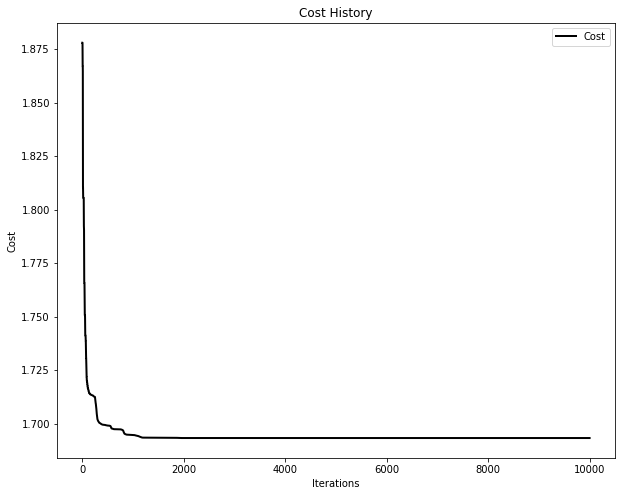

In [107]:
from pyswarms.utils.plotters import (plot_cost_history, plot_contour, plot_surface)
plot_cost_history(cost_history=optimizer.cost_history)


In [108]:
def predict(X, params):
    """
    Use the trained weights to perform class predictions.

    Inputs
    ------
    X: numpy.ndarray
        Input Iris dataset
    pos: numpy.ndarray
        Position matrix found by the swarm. Will be rolled
        into weights and biases.
    
    # Neural network architecture
    n_inputs = 4096
    n_hidden1 = 200
    n_hidden2 = 150
    n_hidden3 = 100
    n_classes = 5
    # Roll-back the weights and biases
    
    W1 = pos[0:819200].reshape((n_inputs,n_hidden1))
    b1 = pos[819200:819400].reshape((n_hidden1,))
    W2 = pos[819400:849400].reshape((n_hidden1,n_hidden2))
    b2 = pos[849400:849550].reshape((n_hidden2,))
    W3 = pos[849550:864550].reshape((n_hidden2,n_hidden3))
    b3 = pos[864550:864650].reshape((n_hidden3,))
    W4 = pos[864650:865150].reshape((n_hidden3,n_classes))
    b4 = pos[865150:865155].reshape((n_classes,))
    """
    # Neural network architecture
    n_inputs = 7
    n_hidden = 20
    n_classes = 7

    # Roll-back the weights and biases
    W1 = params[0:140].reshape((n_inputs,n_hidden))
    b1 = params[140:160].reshape((n_hidden,))
    W2 = params[160:300].reshape((n_hidden,n_classes))
    b2 = params[300:307].reshape((n_classes,))

    # Perform forward propagation
    z1 = X_Train.dot(W1) + b1  # Pre-activation in Layer 1
    a1 = dlrelu(z1)     # Activation in Layer 1
    z2 = a1.dot(W2) + b2 # Pre-activation in Layer 2
    logits = z2          # Logits for Layer 2

    y_pred = np.argmax(logits, axis=1)
    return y_pred

In [109]:
(predict(X_Train, pos) == Y_Train)

0        False
1        False
2        False
3        False
4        False
         ...  
17245    False
17246    False
17247    False
17248     True
17249    False
Name: label, Length: 17250, dtype: bool